In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import max_error
import pmdarima as pm
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.simplefilter("ignore")

In [2]:
# function to predict arima and also calculating accuracy
def arima_model(name):
    #reading data from csv and making date column as index
    df = pd.read_csv(name, index_col='Date',parse_dates=True)       
    #selecting previous closing value for prediction
    price = df['Prev Close']

    #plotting and saving graph of whole closing price
    name = name.split('.')[0]
    s = name + '_orignal_closing_price'
    price.plot(label=s, legend=True, figsize=(12,5))
    plt.title(s)
    s = s + '.png'
    plt.savefig(s)
    plt.show()

    #finding the best order of arima
    stepwise_fit = auto_arima(df['Prev Close'], trace=True, suppress_warnings=True)
    
    #spliting data into train and test and chossing last 120 days for prediction
    train = price.iloc[:-120]
    test = price.iloc[-120:]

    #applying arima model and printing its summary
    model=ARIMA(price,order=stepwise_fit.order)
    model=model.fit()
    print(model.summary())

    #predicting the values using arima for last 120days
    a=len(train)
    b=len(train)+len(test)-1    
    pred=model.predict(start=a,end=b,typ='levels')

    #plotting and saving graph of test vs predictions
    s = name + '_ARIMA_Predictions'
    pred.plot(label= s, legend=True)
    s = name + '_Actual_Data'
    test.plot(label=s, legend=True)
    s = name + '_armima_test_Comparision'
    plt.title(s)
    s = name + '_armima_test_Comparision.png'
    plt.savefig(s)
    plt.show()

    #plotting and saving graph of whole data and predictions
    s = name + '_Actual_Data'
    price.plot(label=s, legend=True, figsize=(12,5))
    s = name + '_ARIMA_Predictions'
    pred.plot(label= s, legend=True)
    s = name + '_armima_all'
    plt.title(s)
    s = name + '_armima_all.png'
    plt.savefig(s)
    plt.show()

    #calculating and printing errors between test and pred
    print('Mean Squared Error: ',mean_squared_error(test, pred))
    print('Mean Squared Log Error: ',mean_squared_log_error(test, pred))
    print('Mean Absolute Error: ',mean_absolute_error(test, pred))
    print('Max Error',max_error(test, pred))

In [7]:
# function to predict sarima and also calculating accuracy
def sarima_model(name):
    #reading data from csv and making date column as index
    df = pd.read_csv(name, index_col='Date',parse_dates=True)       
    #selecting previous closing value for prediction
    price = df['Prev Close']

    #plotting and saving graph of whole closing price
    name = name.split('.')[0]
    s = name + '_orignal_closing_price'
    price.plot(label=s, legend=True, figsize=(12,5))
    plt.title(s)
    s = s + '.png'
    plt.savefig(s)
    plt.show()

    #finding the best order of arima
    stepwise_fit = auto_arima(df['Prev Close'], trace=True, suppress_warnings=True)
    
    #spliting data into train and test and chossing last 120 days for prediction
    train = price.iloc[:-120]
    test = price.iloc[-120:]

    #applying arima model and printing its summary
    model=SARIMAX(price,order=stepwise_fit.order,seasonal_order=(0,0,0,12))
    model=model.fit()
    print(model.summary())

    #predicting the values using arima for last 120days
    a=len(train)
    b=len(train)+len(test)-1    
    pred=model.predict(start=a,end=b,typ='levels')

    #plotting and saving graph of test vs predictions
    s = name + '_SARIMA_Predictions'
    pred.plot(label= s, legend=True)
    s = name + '_Actual_Data'
    test.plot(label=s, legend=True)
    s = name + '_sarmima_test_Comparision'
    plt.title(s)
    s = name + '_sarmima_test_Comparision.png'
    plt.savefig(s)
    plt.show()

    #plotting and saving graph of whole data and predictions
    s = name + '_Actual_Data'
    price.plot(label=s, legend=True, figsize=(12,5))
    s = name + '_SARIMA_Predictions'
    pred.plot(label= s, legend=True)
    s = name + '_sarmima_all'
    plt.title(s)
    s = name + '_sarmima_all.png'
    plt.savefig(s)
    plt.show()

    #calculating and printing errors between test and pred
    print('Mean Squared Error: ',mean_squared_error(test, pred))
    print('Mean Squared Log Error: ',mean_squared_log_error(test, pred))
    print('Mean Absolute Error: ',mean_absolute_error(test, pred))
    print('Max Error',max_error(test, pred))

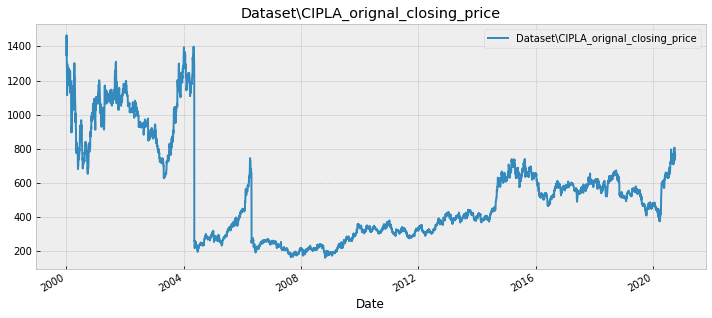

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45751.059, Time=21.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45766.454, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45749.461, Time=1.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45749.851, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45764.615, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=45751.116, Time=2.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45751.204, Time=2.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45753.088, Time=4.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=45747.601, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=45749.251, Time=1.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45749.341, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45747.992, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45751.225, Time=2.21 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 40.488 seconds
       

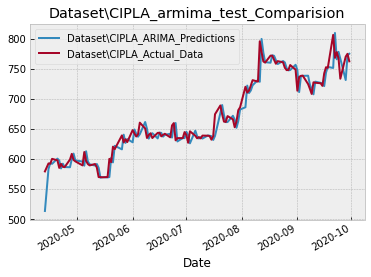

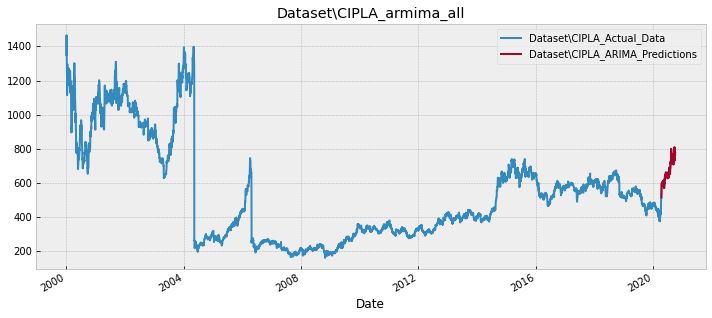

Mean Squared Error:  273.4466980432933
Mean Squared Log Error:  0.000603393659607865
Mean Absolute Error:  11.065398438122838
Max Error 67.20447202801927


In [3]:
arima_model('Dataset\CIPLA.csv')

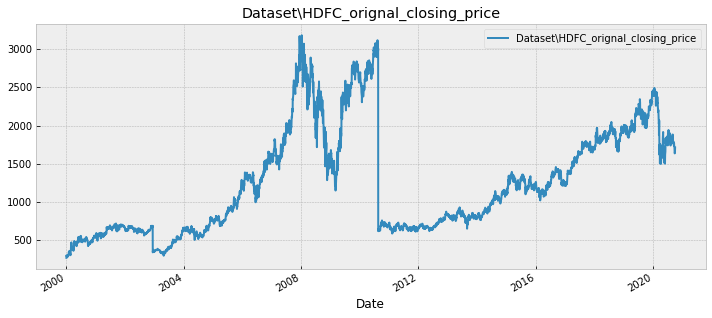

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=54604.066, Time=10.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54613.565, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54615.199, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54615.172, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54611.740, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54602.244, Time=7.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=54610.235, Time=1.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54608.767, Time=3.95 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=54604.025, Time=7.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=54605.836, Time=1.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=54602.126, Time=5.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=54610.247, Time=1.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=54604.055, Time=8.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=54606.553, Time=1.98 sec
 ARIMA(3,1,2)(0,0,

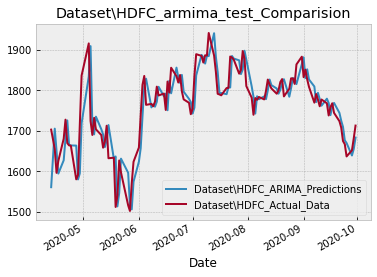

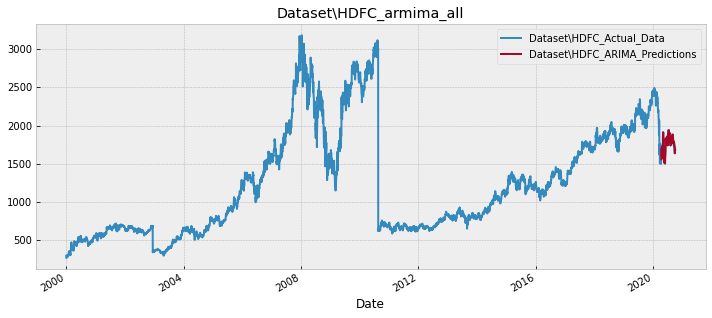

Mean Squared Error:  2145.085731895285
Mean Squared Log Error:  0.0007228978250464888
Mean Absolute Error:  34.19528458601837
Max Error 184.96568583833937


In [4]:
arima_model('Dataset\HDFC.csv')

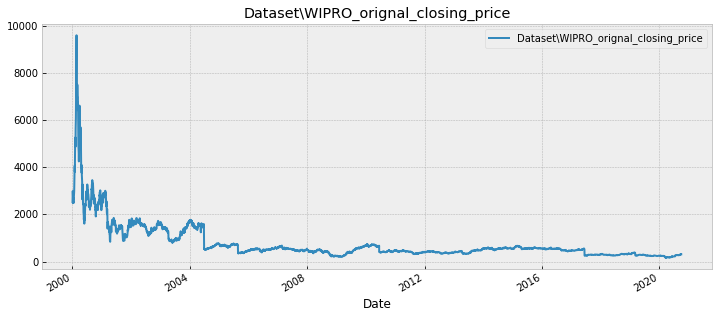

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56264.098, Time=10.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56911.151, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56415.567, Time=2.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56532.220, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56909.415, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56321.914, Time=5.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=56348.677, Time=7.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=56266.088, Time=13.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=56266.093, Time=18.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56377.065, Time=3.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=56305.563, Time=10.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=56304.728, Time=10.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=56268.060, Time=14.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=56262.265, Time=3.75 sec
 ARIMA(1,1,2)

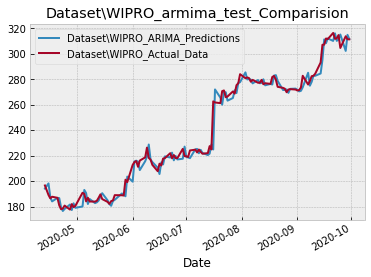

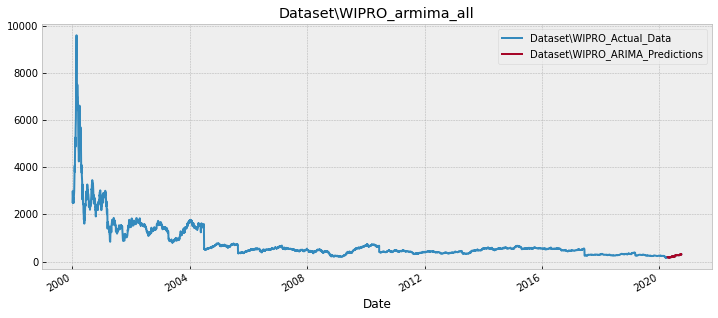

Mean Squared Error:  34.887186486702966
Mean Squared Log Error:  0.0006223561341594715
Mean Absolute Error:  3.930348086211991
Max Error 37.81927669111391


In [5]:
arima_model('Dataset\WIPRO.csv')

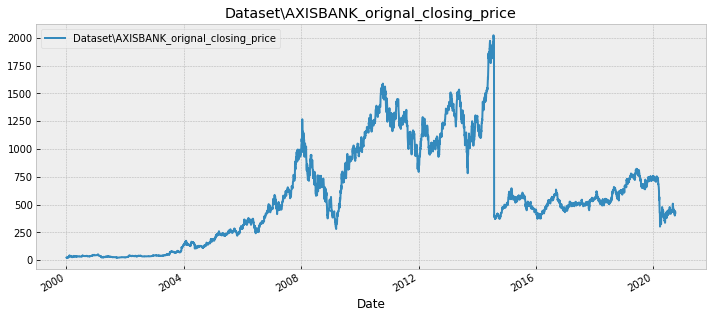

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49119.475, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=49115.312, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49113.603, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49113.570, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49113.352, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49115.472, Time=1.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.418 seconds
                             ARIMA Model Results                              
Dep. Variable:           D.Prev Close   No. Observations:                 5162
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -24555.656
Method:                           css   S.D. of innovations             28.165
Date:                Fri, 18 Dec 2020   AIC                          49115.312
Time:                        19:43:52   BIC                          49128.410
Samp

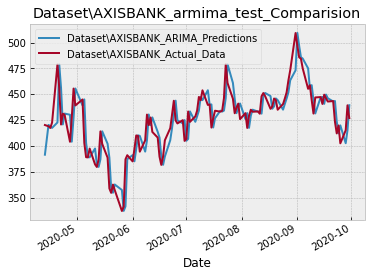

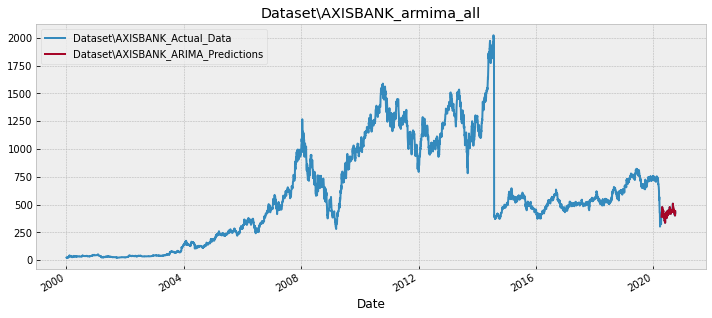

Mean Squared Error:  242.14351669335326
Mean Squared Log Error:  0.0013511020764784556
Mean Absolute Error:  11.90703490249257
Max Error 56.172094149554425


In [6]:
arima_model('Dataset\AXISBANK.csv')

In [11]:
#SARIMA

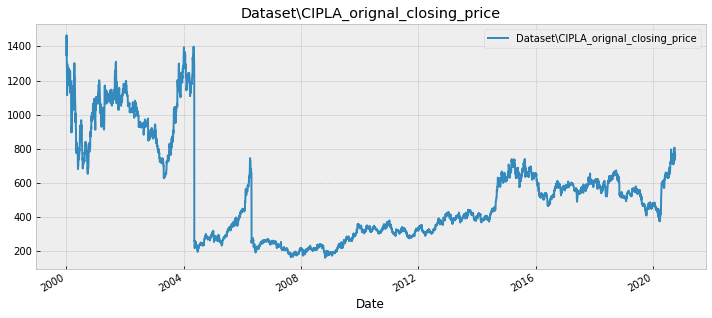

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45751.059, Time=21.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45766.454, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45749.461, Time=1.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45749.851, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45764.615, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=45751.116, Time=2.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45751.204, Time=2.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45753.088, Time=3.79 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=45747.601, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=45749.251, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45749.341, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45747.992, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45751.225, Time=1.88 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 39.298 seconds
       

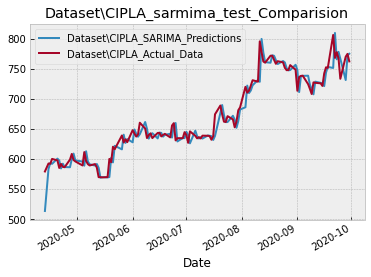

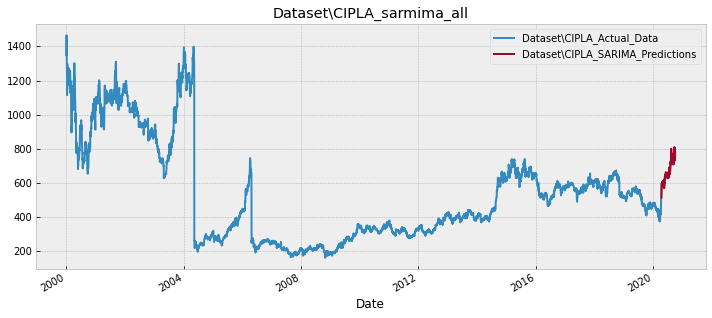

Mean Squared Error:  273.0333588758485
Mean Squared Log Error:  0.0006022263800597487
Mean Absolute Error:  11.072646974543295
Max Error 67.0989797298547


In [12]:
sarima_model('Dataset\CIPLA.csv')

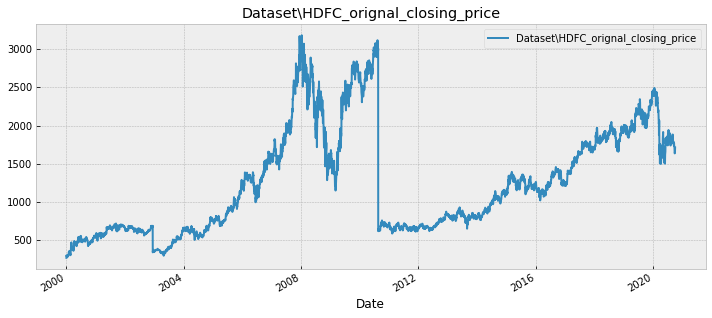

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=54604.066, Time=9.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54613.565, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54615.199, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54615.172, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54611.740, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54602.244, Time=6.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=54610.235, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54608.767, Time=3.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=54604.025, Time=7.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=54605.836, Time=1.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=54602.126, Time=5.79 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=54610.247, Time=1.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=54604.055, Time=8.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=54606.553, Time=1.94 sec
 ARIMA(3,1,2)(0,0,0

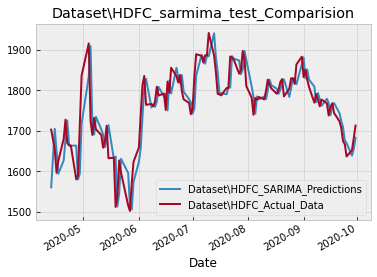

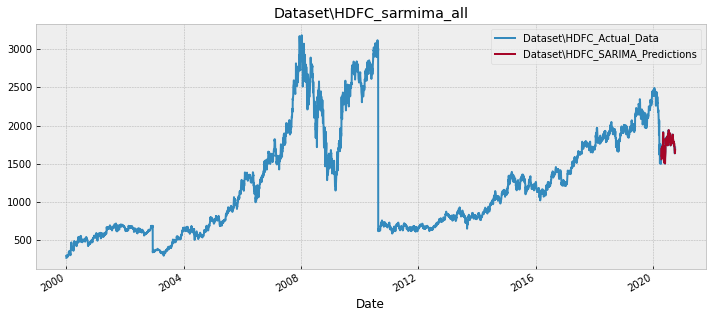

Mean Squared Error:  2145.950624571045
Mean Squared Log Error:  0.0007233343588757899
Mean Absolute Error:  34.17459035078164
Max Error 184.66108385381744


In [13]:
sarima_model('Dataset\HDFC.csv')

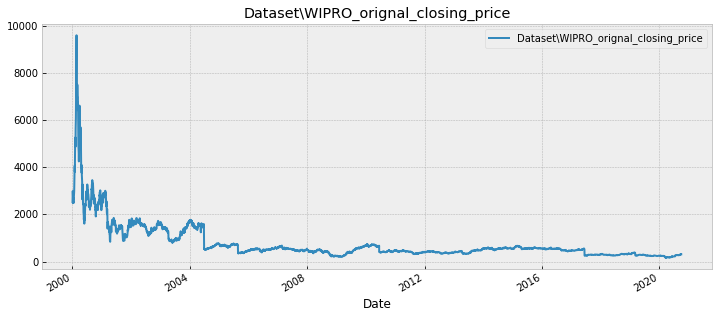

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56264.098, Time=9.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56911.151, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56415.567, Time=2.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56532.220, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56909.415, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56321.914, Time=5.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=56348.677, Time=6.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=56266.088, Time=10.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=56266.093, Time=15.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56377.065, Time=3.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=56305.563, Time=10.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=56304.728, Time=9.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=56268.060, Time=13.81 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=56262.265, Time=3.42 sec
 ARIMA(1,1,2)(0

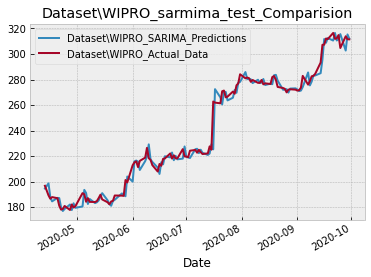

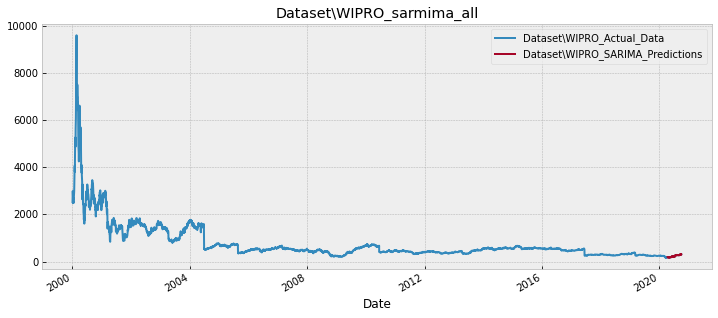

Mean Squared Error:  34.33071791122736
Mean Squared Log Error:  0.0006117286176622376
Mean Absolute Error:  3.9165282407957585
Max Error 37.50461779277501


In [14]:
sarima_model('Dataset\WIPRO.csv')

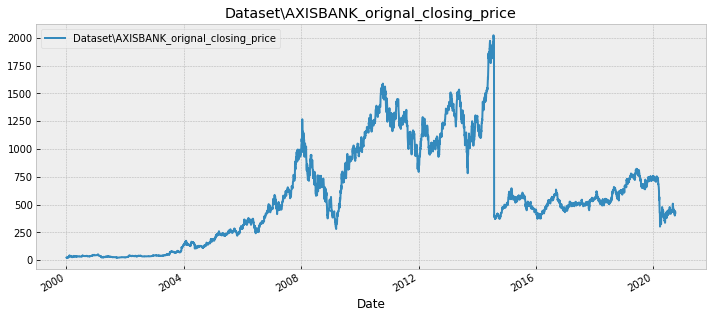

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=49119.475, Time=2.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=49115.312, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49113.603, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=49113.570, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49113.352, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49115.472, Time=0.92 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.109 seconds
                               SARIMAX Results                                
Dep. Variable:             Prev Close   No. Observations:                 5163
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -24555.676
Date:                Fri, 18 Dec 2020   AIC                          49113.352
Time:                        22:32:10   BIC                          49119.901
Sample:                             0   HQIC                         49115.643
    

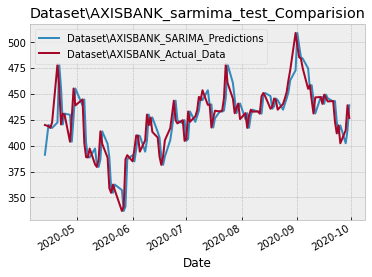

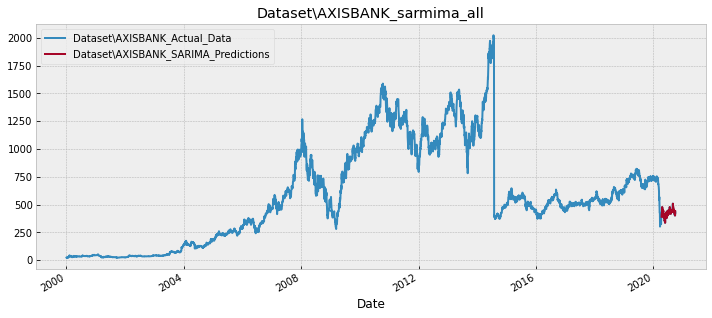

Mean Squared Error:  242.1835416666665
Mean Squared Log Error:  0.0013515948324187772
Mean Absolute Error:  11.90833333333333
Max Error 56.25


In [15]:
sarima_model('Dataset\AXISBANK.csv')